In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## KMeans Clusterer

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist

In [3]:
filename = '../../data/processed/train.csv'
df = pd.read_csv(filename)

In [4]:
df = df.sort_values(['zipcode','start_year']).reset_index(drop=True)

In [5]:
df.head()

,zipcode,start_year,y,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_1_SFR_MSA,...,year_4_SFR_zip,year_5_EQI_MSA,year_5_EQI_state,year_5_EQI_zip,year_5_RECPI_MSA,year_5_RECPI_state,year_5_RECPI_zip,year_5_SFR_MSA,year_5_SFR_state,year_5_SFR_zip
0,1002,1992.0,0.002931,0.001549,0.002111,0.000959,1.176876,28.052156,0.020148,760.0,...,26.0,0.001361,0.002326,0.001732,1.203223,38.430626,0.072728,884.0,16520.0,42.0
1,1002,1997.0,0.002640,0.001233,0.002386,0.004272,1.112023,41.174500,0.128172,902.0,...,48.0,0.001299,0.003029,0.002709,1.177120,55.327602,0.151722,906.0,18265.0,56.0
2,1002,2002.0,0.001622,0.001494,0.002450,0.005398,1.746593,50.713380,0.291470,1169.0,...,63.0,0.000917,0.001913,0.000684,1.454710,47.060886,0.046530,1586.0,24597.0,68.0
3,1002,2007.0,0.002022,0.000702,0.001817,0.000895,1.081845,45.171143,0.068894,1541.0,...,59.0,0.000808,0.001884,0.001899,1.144370,45.149307,0.121545,1417.0,23961.0,64.0
4,1005,1992.0,0.001055,0.000529,0.002111,0.000714,0.039692,28.052156,0.004995,75.0,...,4.0,0.000824,0.002326,0.000659,0.101315,38.430626,0.003296,123.0,16520.0,5.0


In [40]:
y = df[['y']]
X = df.drop(['zipcode','start_year','y'], axis=1)
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
X_scaled.columns = X.columns
X_scaled.head()

,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_1_SFR_MSA,year_1_SFR_state,year_1_SFR_zip,year_2_EQI_MSA,...,year_4_SFR_zip,year_5_EQI_MSA,year_5_EQI_state,year_5_EQI_zip,year_5_RECPI_MSA,year_5_RECPI_state,year_5_RECPI_zip,year_5_SFR_MSA,year_5_SFR_state,year_5_SFR_zip
0,1.194926,3.112617,0.325032,-0.333235,-0.017656,-0.095441,-0.429886,-0.683757,-0.318415,1.166173,...,-0.321297,1.432340,3.420169,1.048569,-0.354833,0.100137,0.344236,-0.454230,-0.704287,-0.200388
1,0.804873,3.684255,2.765205,-0.341695,0.264854,1.055330,-0.419515,-0.594803,-0.233218,1.002712,...,-0.135782,1.328502,4.788334,1.861704,-0.357786,0.414437,1.040345,-0.452848,-0.669996,-0.086252
2,1.127672,3.815891,3.593980,-0.258917,0.470216,2.794942,-0.400015,-0.517470,-0.006029,0.857293,...,-0.009295,0.687261,2.616164,0.177520,-0.326374,0.260668,0.113376,-0.410147,-0.545566,0.011578
3,0.149019,2.501746,0.277366,-0.345631,0.350897,0.423842,-0.372846,-0.424028,0.211695,0.351448,...,-0.043025,0.503264,2.559723,1.187898,-0.361492,0.225111,0.774420,-0.420760,-0.558064,-0.021032
4,-0.064507,3.112617,0.143961,-0.481576,-0.017656,-0.256866,-0.479915,-0.683757,-0.450942,-0.017546,...,-0.506811,0.530287,3.420169,0.156603,-0.479526,0.100137,-0.267609,-0.502018,-0.704287,-0.502031


#### Whole Dataset

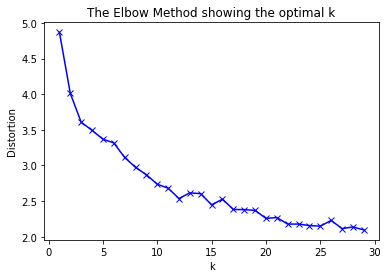

In [7]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,30)
for k in K:
    model = KMeans(n_clusters=k).fit(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
dataset_clusterer = KMeans(n_clusters=14).fit(X_scaled)

#### Zip

In [9]:
X_zip = X_scaled.filter(regex='zip$', axis=1)
X_zip.head()

,year_1_EQI_zip,year_1_RECPI_zip,year_1_SFR_zip,year_2_EQI_zip,year_2_RECPI_zip,year_2_SFR_zip,year_3_EQI_zip,year_3_RECPI_zip,year_3_SFR_zip,year_4_EQI_zip,year_4_RECPI_zip,year_4_SFR_zip,year_5_EQI_zip,year_5_RECPI_zip,year_5_SFR_zip
0,0.325032,-0.095441,-0.318415,2.228276,0.902230,-0.162522,2.164136,0.829391,-0.204699,3.779443,1.256587,-0.321297,1.048569,0.344236,-0.200388
1,2.765205,1.055330,-0.233218,0.371323,-0.026265,-0.249125,1.641123,0.770289,-0.141069,2.208558,1.457506,-0.135782,1.861704,1.040345,-0.086252
2,3.593980,2.794942,-0.006029,0.808345,0.422703,-0.056674,3.435808,2.627577,0.040728,0.425401,0.364875,-0.009295,0.177520,0.113376,0.011578
3,0.277366,0.423842,0.211695,2.361544,1.521306,0.001062,0.356544,0.253287,0.013458,0.526993,0.411306,-0.043025,1.187898,0.774420,-0.021032
4,0.143961,-0.256866,-0.450942,1.050663,-0.301627,-0.528180,0.395327,-0.248835,-0.486485,0.367352,-0.240310,-0.506811,0.156603,-0.267609,-0.502031


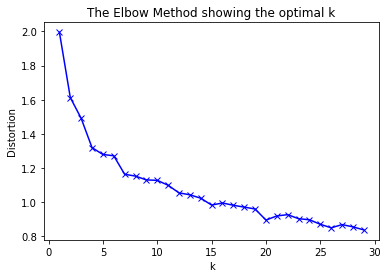

In [10]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,30)
for k in K:
    model = KMeans(n_clusters=k).fit(X_zip)
    distortions.append(sum(np.min(cdist(X_zip, model.cluster_centers_, 'euclidean'), axis=1)) / X_zip.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [11]:
zip_clusterer = KMeans(n_clusters=4).fit(X_zip)

#### MSA

In [12]:
X_msa = X_scaled.filter(regex='MSA$', axis=1)
X_msa.head()

,year_1_EQI_MSA,year_1_RECPI_MSA,year_1_SFR_MSA,year_2_EQI_MSA,year_2_RECPI_MSA,year_2_SFR_MSA,year_3_EQI_MSA,year_3_RECPI_MSA,year_3_SFR_MSA,year_4_EQI_MSA,year_4_RECPI_MSA,year_4_SFR_MSA,year_5_EQI_MSA,year_5_RECPI_MSA,year_5_SFR_MSA
0,1.194926,-0.333235,-0.429886,1.166173,-0.368889,-0.447253,1.509088,-0.369583,-0.461802,1.835996,-0.340910,-0.465458,1.432340,-0.354833,-0.454230
1,0.804873,-0.341695,-0.419515,1.002712,-0.381434,-0.448045,3.108435,-0.250021,-0.455348,1.210587,-0.360145,-0.458603,1.328502,-0.357786,-0.452848
2,1.127672,-0.258917,-0.400015,0.857293,-0.336498,-0.419816,1.210167,-0.291299,-0.419069,0.356585,-0.366250,-0.421663,0.687261,-0.326374,-0.410147
3,0.149019,-0.345631,-0.372846,0.351448,-0.359569,-0.400589,0.348576,-0.390370,-0.427018,0.444565,-0.367194,-0.428899,0.503264,-0.361492,-0.420760
4,-0.064507,-0.481576,-0.479915,-0.017546,-0.499909,-0.502270,-0.139072,-0.503892,-0.510242,-0.226663,-0.482238,-0.510714,0.530287,-0.479526,-0.502018


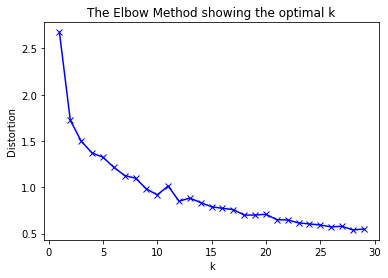

In [13]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,30)
for k in K:
    model = KMeans(n_clusters=k).fit(X_msa)
    distortions.append(sum(np.min(cdist(X_msa, model.cluster_centers_, 'euclidean'), axis=1)) / X_msa.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
msa_clusterer = KMeans(n_clusters=5).fit(X_msa)

#### State

In [15]:
X_state = X_scaled.filter(regex='state$', axis=1)
X_state.head()

,year_1_EQI_state,year_1_RECPI_state,year_1_SFR_state,year_2_EQI_state,year_2_RECPI_state,year_2_SFR_state,year_3_EQI_state,year_3_RECPI_state,year_3_SFR_state,year_4_EQI_state,year_4_RECPI_state,year_4_SFR_state,year_5_EQI_state,year_5_RECPI_state,year_5_SFR_state
0,3.112617,-0.017656,-0.683757,3.022850,0.008171,-0.694005,2.838755,-0.006849,-0.695893,2.618800,-0.046340,-0.709981,3.420169,0.100137,-0.704287
1,3.684255,0.264854,-0.594803,4.086626,0.345992,-0.624333,4.747265,0.528944,-0.613797,5.762893,0.834669,-0.588162,4.788334,0.414437,-0.669996
2,3.815891,0.470216,-0.517470,3.434036,0.458618,-0.518942,2.545969,0.308842,-0.497272,2.179417,0.209592,-0.509824,2.616164,0.260668,-0.545566
3,2.501746,0.350897,-0.424028,3.162771,0.456626,-0.489293,2.473523,0.199714,-0.548154,2.281278,0.173232,-0.547031,2.559723,0.225111,-0.558064
4,3.112617,-0.017656,-0.683757,3.022850,0.008171,-0.694005,2.838755,-0.006849,-0.695893,2.618800,-0.046340,-0.709981,3.420169,0.100137,-0.704287


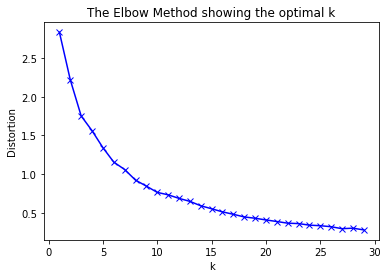

In [16]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,30)
for k in K:
    model = KMeans(n_clusters=k).fit(X_state)
    distortions.append(sum(np.min(cdist(X_state, model.cluster_centers_, 'euclidean'), axis=1)) / X_state.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
state_clusterer = KMeans(n_clusters=6).fit(X_state)

#### EQI

In [18]:
X_eqi = df.filter(regex='.*EQI.*', axis=1)
X_eqi.head()

,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_2_EQI_MSA,year_2_EQI_state,year_2_EQI_zip,year_3_EQI_MSA,year_3_EQI_state,year_3_EQI_zip,year_4_EQI_MSA,year_4_EQI_state,year_4_EQI_zip,year_5_EQI_MSA,year_5_EQI_state,year_5_EQI_zip
0,0.001549,0.002111,0.000959,0.001266,0.002057,0.002858,0.001394,0.001996,0.003037,0.001667,0.002023,0.007120,0.001361,0.002326,0.001732
1,0.001233,0.002386,0.004272,0.001164,0.002573,0.000891,0.002317,0.002948,0.002421,0.001278,0.003745,0.004361,0.001299,0.003029,0.002709
2,0.001494,0.002450,0.005398,0.001073,0.002257,0.001354,0.001222,0.001850,0.004535,0.000747,0.001782,0.001231,0.000917,0.001913,0.000684
3,0.000702,0.001817,0.000895,0.000758,0.002125,0.002999,0.000725,0.001814,0.000908,0.000801,0.001838,0.001409,0.000808,0.001884,0.001899
4,0.000529,0.002111,0.000714,0.000527,0.002057,0.001611,0.000443,0.001996,0.000954,0.000384,0.002023,0.001129,0.000824,0.002326,0.000659


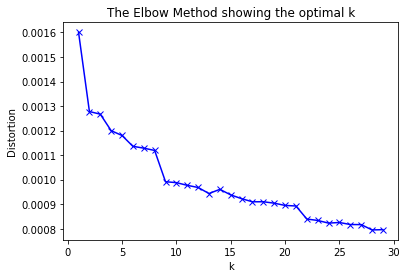

In [19]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,30)
for k in K:
    model = KMeans(n_clusters=k).fit(X_eqi)
    distortions.append(sum(np.min(cdist(X_eqi, model.cluster_centers_, 'euclidean'), axis=1)) / X_eqi.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [20]:
eqi_clusterer = KMeans(n_clusters=5).fit(X_eqi)

#### SFR

In [21]:
X_sfr = df.filter(regex='.*SFR.*', axis=1)
X_sfr.head()

,year_1_SFR_MSA,year_1_SFR_state,year_1_SFR_zip,year_2_SFR_MSA,year_2_SFR_state,year_2_SFR_zip,year_3_SFR_MSA,year_3_SFR_state,year_3_SFR_zip,year_4_SFR_MSA,year_4_SFR_state,year_4_SFR_zip,year_5_SFR_MSA,year_5_SFR_state,year_5_SFR_zip
0,760.0,13289.0,21.0,824.0,14110.0,39.0,804.0,14843.0,37.0,817.0,15180.0,26.0,884.0,16520.0,42.0
1,902.0,17254.0,30.0,813.0,17186.0,30.0,899.0,18675.0,44.0,925.0,21296.0,48.0,906.0,18265.0,56.0
2,1169.0,20701.0,54.0,1205.0,21839.0,50.0,1433.0,24114.0,64.0,1507.0,25229.0,63.0,1586.0,24597.0,68.0
3,1541.0,24866.0,77.0,1472.0,23148.0,56.0,1316.0,21739.0,61.0,1393.0,23361.0,59.0,1417.0,23961.0,64.0
4,75.0,13289.0,7.0,60.0,14110.0,1.0,91.0,14843.0,6.0,104.0,15180.0,4.0,123.0,16520.0,5.0


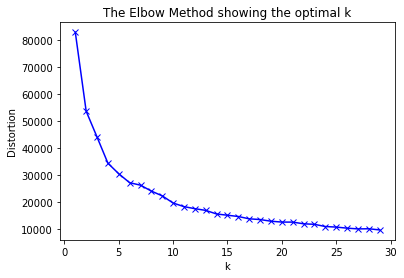

In [22]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,30)
for k in K:
    model = KMeans(n_clusters=k).fit(X_sfr)
    distortions.append(sum(np.min(cdist(X_sfr, model.cluster_centers_, 'euclidean'), axis=1)) / X_sfr.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [23]:
sfr_clusterer = KMeans(n_clusters=4).fit(X_sfr)

#### RECPI

In [24]:
X_recpi = df.filter(regex='.*RECPI.*', axis=1)
X_recpi.head()

,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_2_RECPI_MSA,year_2_RECPI_state,year_2_RECPI_zip,year_3_RECPI_MSA,year_3_RECPI_state,year_3_RECPI_zip,year_4_RECPI_MSA,year_4_RECPI_state,year_4_RECPI_zip,year_5_RECPI_MSA,year_5_RECPI_state,year_5_RECPI_zip
0,1.176876,28.052156,0.020148,1.043205,29.028145,0.111467,1.121105,29.624968,0.112374,1.362325,30.703022,0.185111,1.203223,38.430626,0.072728
1,1.112023,41.174500,0.128172,0.946344,44.217280,0.026739,2.083184,55.052444,0.106528,1.182342,79.760650,0.209351,1.177120,55.327602,0.151722
2,1.746593,50.713380,0.291470,1.293282,49.281204,0.067709,1.751030,44.606937,0.290240,1.125222,44.954205,0.077528,1.454710,47.060886,0.046530
3,1.081845,45.171143,0.068894,1.115158,49.191620,0.167960,0.953836,39.427960,0.055389,1.116383,42.929550,0.083130,1.144370,45.149307,0.121545
4,0.039692,28.052156,0.004995,0.031638,29.028145,0.001611,0.040352,29.624968,0.005722,0.039899,30.703022,0.004515,0.101315,38.430626,0.003296


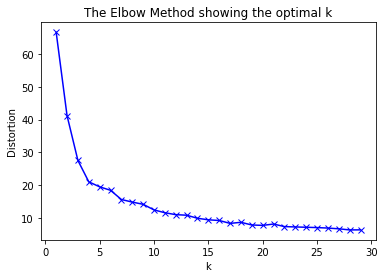

In [25]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,30)
for k in K:
    model = KMeans(n_clusters=k).fit(X_recpi)
    distortions.append(sum(np.min(cdist(X_recpi, model.cluster_centers_, 'euclidean'), axis=1)) / X_recpi.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [26]:
recpi_clusterer = KMeans(n_clusters=4).fit(X_recpi)

## Predicting Training Dataset

In [30]:
X_scaled.head()

,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_1_SFR_MSA,year_1_SFR_state,year_1_SFR_zip,year_2_EQI_MSA,...,year_4_SFR_zip,year_5_EQI_MSA,year_5_EQI_state,year_5_EQI_zip,year_5_RECPI_MSA,year_5_RECPI_state,year_5_RECPI_zip,year_5_SFR_MSA,year_5_SFR_state,year_5_SFR_zip
0,1.194926,3.112617,0.325032,-0.333235,-0.017656,-0.095441,-0.429886,-0.683757,-0.318415,1.166173,...,-0.321297,1.432340,3.420169,1.048569,-0.354833,0.100137,0.344236,-0.454230,-0.704287,-0.200388
1,0.804873,3.684255,2.765205,-0.341695,0.264854,1.055330,-0.419515,-0.594803,-0.233218,1.002712,...,-0.135782,1.328502,4.788334,1.861704,-0.357786,0.414437,1.040345,-0.452848,-0.669996,-0.086252
2,1.127672,3.815891,3.593980,-0.258917,0.470216,2.794942,-0.400015,-0.517470,-0.006029,0.857293,...,-0.009295,0.687261,2.616164,0.177520,-0.326374,0.260668,0.113376,-0.410147,-0.545566,0.011578
3,0.149019,2.501746,0.277366,-0.345631,0.350897,0.423842,-0.372846,-0.424028,0.211695,0.351448,...,-0.043025,0.503264,2.559723,1.187898,-0.361492,0.225111,0.774420,-0.420760,-0.558064,-0.021032
4,-0.064507,3.112617,0.143961,-0.481576,-0.017656,-0.256866,-0.479915,-0.683757,-0.450942,-0.017546,...,-0.506811,0.530287,3.420169,0.156603,-0.479526,0.100137,-0.267609,-0.502018,-0.704287,-0.502031


In [33]:
df['dataset_cluster'] = dataset_clusterer.predict(X_scaled)
df['zip_cluster'] = zip_clusterer.predict(X_scaled.filter(regex='zip$', axis=1))
df['msa_cluster'] = msa_clusterer.predict(X_scaled.filter(regex='MSA$', axis=1))
df['state_cluster'] = state_clusterer.predict(X_scaled.filter(regex='state$', axis=1))
df['eqi_cluster'] = eqi_clusterer.predict(X_scaled.filter(regex='.*EQI.*', axis=1))
df['sfr_cluster'] = sfr_clusterer.predict(X_scaled.filter(regex='.*SFR.*', axis=1))
df['recpi_cluster'] = recpi_clusterer.predict(X_scaled.filter(regex='.*RECPI.*', axis=1))

In [34]:
df.head()

,zipcode,start_year,y,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_1_SFR_MSA,...,year_5_SFR_MSA,year_5_SFR_state,year_5_SFR_zip,dataset_cluster,zip_cluster,msa_cluster,state_cluster,eqi_cluster,sfr_cluster,recpi_cluster
0,1002,1992.0,0.002931,0.001549,0.002111,0.000959,1.176876,28.052156,0.020148,760.0,...,884.0,16520.0,42.0,6,1,4,3,3,1,0
1,1002,1997.0,0.002640,0.001233,0.002386,0.004272,1.112023,41.174500,0.128172,902.0,...,906.0,18265.0,56.0,6,1,4,3,3,1,0
2,1002,2002.0,0.001622,0.001494,0.002450,0.005398,1.746593,50.713380,0.291470,1169.0,...,1586.0,24597.0,68.0,6,0,4,3,4,1,0
3,1002,2007.0,0.002022,0.000702,0.001817,0.000895,1.081845,45.171143,0.068894,1541.0,...,1417.0,23961.0,64.0,6,1,0,3,4,1,0
4,1005,1992.0,0.001055,0.000529,0.002111,0.000714,0.039692,28.052156,0.004995,75.0,...,123.0,16520.0,5.0,6,1,0,3,3,1,0


In [36]:
path = '../../data/processed/train_clustered.csv'
df.to_csv(path, index=False)

## Predicting Test Dataset

In [47]:
filename = '../../data/processed/test.csv'
df = pd.read_csv(filename)

In [48]:
df = df.sort_values(['zipcode','start_year']).reset_index(drop=True)

In [49]:
X = df.drop(['zipcode','start_year','y'], axis=1)
X_scaled = pd.DataFrame(scaler.transform(X))
X_scaled.columns = X.columns
X_scaled.head()

,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_1_SFR_MSA,year_1_SFR_state,year_1_SFR_zip,year_2_EQI_MSA,...,year_4_SFR_zip,year_5_EQI_MSA,year_5_EQI_state,year_5_EQI_zip,year_5_RECPI_MSA,year_5_RECPI_state,year_5_RECPI_zip,year_5_SFR_MSA,year_5_SFR_state,year_5_SFR_zip
0,1.194926,3.112617,1.250292,-0.333235,-0.017656,0.209189,-0.429886,-0.683757,-0.308948,1.166173,...,-0.346594,1.432340,3.420169,1.247847,-0.354833,0.100137,0.207100,-0.454230,-0.704287,-0.306370
1,0.804873,3.684255,0.237108,-0.341695,0.264854,0.065786,-0.419515,-0.594803,-0.119624,1.002712,...,-0.211674,1.328502,4.788334,1.134205,-0.357786,0.414437,0.172180,-0.452848,-0.669996,-0.306370
2,1.127672,3.815891,0.725864,-0.258917,0.470216,0.266575,-0.400015,-0.517470,-0.176421,0.857293,...,-0.177945,0.687261,2.616164,2.779996,-0.326374,0.260668,1.316384,-0.410147,-0.545566,-0.151473
3,0.149019,2.501746,0.068558,-0.345631,0.350897,0.074094,-0.372846,-0.424028,0.041303,0.351448,...,-0.076755,0.503264,2.559723,0.007968,-0.361492,0.225111,-0.084986,-0.420760,-0.558064,-0.135167
4,1.194926,3.112617,0.663460,-0.333235,-0.017656,-0.128692,-0.429886,-0.683757,-0.403611,1.166173,...,-0.422487,1.432340,3.420169,0.669911,-0.354833,0.100137,-0.127944,-0.454230,-0.704287,-0.420505


In [50]:
df['dataset_cluster'] = dataset_clusterer.predict(X_scaled)
df['zip_cluster'] = zip_clusterer.predict(X_scaled.filter(regex='zip$', axis=1))
df['msa_cluster'] = msa_clusterer.predict(X_scaled.filter(regex='MSA$', axis=1))
df['state_cluster'] = state_clusterer.predict(X_scaled.filter(regex='state$', axis=1))
df['eqi_cluster'] = eqi_clusterer.predict(X_scaled.filter(regex='.*EQI.*', axis=1))
df['sfr_cluster'] = sfr_clusterer.predict(X_scaled.filter(regex='.*SFR.*', axis=1))
df['recpi_cluster'] = recpi_clusterer.predict(X_scaled.filter(regex='.*RECPI.*', axis=1))

In [51]:
df.head()

,zipcode,start_year,y,year_1_EQI_MSA,year_1_EQI_state,year_1_EQI_zip,year_1_RECPI_MSA,year_1_RECPI_state,year_1_RECPI_zip,year_1_SFR_MSA,...,year_5_SFR_MSA,year_5_SFR_state,year_5_SFR_zip,dataset_cluster,zip_cluster,msa_cluster,state_cluster,eqi_cluster,sfr_cluster,recpi_cluster
0,1001,1992.0,0.001287,0.001549,0.002111,0.002216,1.176876,28.052156,0.048744,760.0,...,884.0,16520.0,29.0,6,1,4,3,4,1,0
1,1001,1997.0,0.001853,0.001233,0.002386,0.000840,1.112023,41.174500,0.035283,902.0,...,906.0,18265.0,29.0,6,1,4,3,4,1,0
2,1001,2002.0,0.000602,0.001494,0.002450,0.001504,1.746593,50.713380,0.054131,1169.0,...,1586.0,24597.0,48.0,6,1,4,3,4,1,0
3,1001,2007.0,0.000898,0.000702,0.001817,0.000611,1.081845,45.171143,0.036063,1541.0,...,1417.0,23961.0,50.0,6,1,0,3,4,1,0
4,1007,1992.0,0.001195,0.001549,0.002111,0.001419,1.176876,28.052156,0.017027,760.0,...,884.0,16520.0,15.0,6,1,4,3,4,1,0


In [53]:
path = '../../data/processed/test_clustered.csv'
df.to_csv(path, index=False)